In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Datasets using Pandas

In [3]:
df = pd.read_csv("./bank_funnel_lead_data.csv")

Perform basic steps

In [5]:
# use to display top 5 data from datasets
df.head()

,visitor_id,date,bank,channel,city,device,visited,lead,customer,product,revenue
0,V000001,2024-01-01 00:00:00,Global IME Bank,Email Campaign,Biratnagar,Mobile,1,0,0,NaN,0
1,V000002,2024-01-01 01:00:00,Machhapuchhre Bank,Facebook Ads,Lalitpur,Desktop,1,0,0,NaN,0
2,V000003,2024-01-01 02:00:00,Everest Bank,Email Campaign,Nepalgunj,Tablet,1,0,0,NaN,0
3,V000004,2024-01-01 03:00:00,Machhapuchhre Bank,Referral,Pokhara,Desktop,1,0,0,NaN,0
4,V000005,2024-01-01 04:00:00,Machhapuchhre Bank,Google Search,Biratnagar,Mobile,1,1,0,NaN,0


In [6]:
# use to display dataset from last 5 row
df.tail()

,visitor_id,date,bank,channel,city,device,visited,lead,customer,product,revenue
24995,V024996,2026-11-07 11:00:00,Sanima Bank,Referral,Kathmandu,Desktop,1,1,0,NaN,0
24996,V024997,2026-11-07 12:00:00,NMB Bank,Organic Search,Butwal,Desktop,1,0,0,NaN,0
24997,V024998,2026-11-07 13:00:00,Everest Bank,Google Search,Butwal,Mobile,1,0,0,NaN,0
24998,V024999,2026-11-07 14:00:00,Global IME Bank,Referral,Pokhara,Mobile,1,1,1,Fixed Deposit,102229
24999,V025000,2026-11-07 15:00:00,NIC Asia Bank,Facebook Ads,Kathmandu,Tablet,1,1,0,NaN,0


In [12]:
# use to take out random single row from dataset
df.sample()

,visitor_id,date,bank,channel,city,device,visited,lead,customer,product,revenue
6730,V006731,2024-10-07 10:00:00,NMB Bank,Facebook Ads,Biratnagar,Desktop,1,0,0,NaN,0


In [19]:
# to find total columns in datasets
print(df.columns)
print(f"Total Columns: {df.columns.nunique()}")

Index(['visitor_id', 'date', 'bank', 'channel', 'city', 'device', 'visited',
       'lead', 'customer', 'product', 'revenue'],
      dtype='object')
Total Columns: 11


In [ ]:
# data type of all columns
df.dtypes

visitor_id    object
date          object
bank          object
channel       object
city          object
device        object
visited        int64
lead           int64
customer       int64
product       object
revenue        int64
dtype: object

In [ ]:
# converting date column from object to datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtypes)

datetime64[ns]


In [22]:
df.dtypes

visitor_id            object
date          datetime64[ns]
bank                  object
channel               object
city                  object
device                object
visited                int64
lead                   int64
customer               int64
product               object
revenue                int64
dtype: object

In [24]:
df['revenue'] = df['revenue'].astype('float')
print(df['revenue'].dtypes)

float64


In [25]:
df.dtypes

visitor_id            object
date          datetime64[ns]
bank                  object
channel               object
city                  object
device                object
visited                int64
lead                   int64
customer               int64
product               object
revenue              float64
dtype: object

In [35]:
# info about all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   visitor_id  25000 non-null  object        
 1   date        25000 non-null  datetime64[ns]
 2   bank        25000 non-null  object        
 3   channel     25000 non-null  object        
 4   city        25000 non-null  object        
 5   device      25000 non-null  object        
 6   visited     25000 non-null  int64         
 7   lead        25000 non-null  int64         
 8   customer    25000 non-null  int64         
 9   product     25000 non-null  object        
 10  revenue     25000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 2.1+ MB


In [31]:
# showing statiscal data for numeric columns
df.describe()

,date,visited,lead,customer,revenue
count,25000,25000.0,25000.000000,25000.00000,25000.000000
mean,2025-06-04 19:30:00,1.0,0.449440,0.11472,20256.978520
min,2024-01-01 00:00:00,1.0,0.000000,0.00000,0.000000
25%,2024-09-17 09:45:00,1.0,0.000000,0.00000,0.000000
50%,2025-06-04 19:30:00,1.0,0.000000,0.00000,0.000000
75%,2026-02-20 05:15:00,1.0,1.000000,0.00000,0.000000
max,2026-11-07 15:00:00,1.0,1.000000,1.00000,998406.000000
std,NaN,0.0,0.497447,0.31869,107156.298363


In [7]:
# showing statiscal data including object
df.describe(include="object")

,visitor_id,date,bank,channel,city,device,product
count,25000,25000,25000,25000,25000,25000,2868
unique,25000,25000,6,5,7,3,4
top,V000001,2024-01-01 00:00:00,NMB Bank,Referral,Biratnagar,Mobile,Savings Account
freq,1,1,4258,5111,3639,8382,750


In [34]:
# dimension of dataframe
df.shape

(25000, 11)

Data Preprocessing and Cleaning

In [39]:
# check for null and duplicate values

print("Finding null values\n")
null_values = df.isnull().sum()
print(null_values)

print("\nFinding Duplicate values ")
duplicate_values = df.duplicated().sum()
print(f"Total Duplicate: {duplicate_values}")

print("\nTotal Unique data \n")
unique_data = df.nunique()
print(unique_data)

Finding null values

visitor_id    0
date          0
bank          0
channel       0
city          0
device        0
visited       0
lead          0
customer      0
product       0
revenue       0
dtype: int64

Finding Duplicate values 
Total Duplicate: 0

Total Unique data 

visitor_id    25000
date          25000
bank              6
channel           5
city              7
device            3
visited           1
lead              2
customer          2
product           5
revenue        2717
dtype: int64


In [10]:
df['product'].value_counts(dropna=False)

product
NaN                22132
Savings Account      750
Credit Card          734
Fixed Deposit        696
Loan                 688
Name: count, dtype: int64

In [4]:
df['product'] = df['product'].fillna('No Product')

In [15]:
df['product'].value_counts()

product
No Product         22132
Savings Account      750
Credit Card          734
Fixed Deposit        696
Loan                 688
Name: count, dtype: int64

In [18]:
df['bank'].value_counts(dropna=False)

bank
NMB Bank              4258
Sanima Bank           4210
Machhapuchhre Bank    4188
Global IME Bank       4154
NIC Asia Bank         4154
Everest Bank          4036
Name: count, dtype: int64

In [19]:
df['channel'].value_counts(dropna=False)

channel
Referral          5111
Organic Search    5086
Google Search     4987
Email Campaign    4952
Facebook Ads      4864
Name: count, dtype: int64

In [22]:
exclude_cols = ['visitor_id','revenue', 'date']

cols = [col for col in df.select_dtypes(include='object').columns if col not in exclude_cols]

for col in cols:
    print(f"\nValue counts for: {col}")
    print(df[col].value_counts(dropna=False))



Value counts for: bank
bank
NMB Bank              4258
Sanima Bank           4210
Machhapuchhre Bank    4188
Global IME Bank       4154
NIC Asia Bank         4154
Everest Bank          4036
Name: count, dtype: int64

Value counts for: channel
channel
Referral          5111
Organic Search    5086
Google Search     4987
Email Campaign    4952
Facebook Ads      4864
Name: count, dtype: int64

Value counts for: city
city
Biratnagar    3639
Butwal        3620
Kathmandu     3587
Pokhara       3566
Lalitpur      3546
Bharatpur     3543
Nepalgunj     3499
Name: count, dtype: int64

Value counts for: device
device
Mobile     8382
Desktop    8379
Tablet     8239
Name: count, dtype: int64

Value counts for: product
product
No Product         22132
Savings Account      750
Credit Card          734
Fixed Deposit        696
Loan                 688
Name: count, dtype: int64


Data Analyzing


In [ ]:
# Calculate totals
total_visitors = df['visited'].sum()
total_leads = df['lead'].sum()
total_customers = df['customer'].sum()

# Calculate conversion rates
visit_to_lead_rate = total_leads / total_visitors if total_visitors else 0
lead_to_customer_rate = total_customers / total_leads if total_leads else 0
visit_to_customer_rate = total_customers / total_visitors if total_visitors else 0

# Print conversion rates 
print("=== Funnel Conversion Rates ===")
print(f"Visit → Lead: {visit_to_lead_rate*100:.2f}%")
print(f"Lead → Customer: {lead_to_customer_rate*100:.2f}%")
print(f"Visit → Customer: {visit_to_customer_rate*100:.2f}%\n")

# Calculate drop-offs
# Absolute Drop: percentage points lost
abs_drop_visit_to_lead = 100 - visit_to_lead_rate*100
abs_drop_lead_to_customer = visit_to_lead_rate*100 - lead_to_customer_rate*100
abs_drop_visit_to_customer = 100 - visit_to_customer_rate*100

# Relative Drop: % lost relative to previous stage
rel_drop_visit_to_lead = abs_drop_visit_to_lead
rel_drop_lead_to_customer = (total_leads - total_customers)/total_leads*100 if total_leads else 0

# Print drop-offs 
print("=== Funnel Drop-Offs ===")
print(f"Absolute Drop: Visit → Lead: {abs_drop_visit_to_lead:.2f}%")
print(f"Absolute Drop: Lead → Customer: {abs_drop_lead_to_customer:.2f}%")
print(f"Absolute Drop: Visit → Customer: {abs_drop_visit_to_customer:.2f}%\n")

print(f"Relative Drop: Visit → Lead: {rel_drop_visit_to_lead:.2f}%")
print(f"Relative Drop: Lead → Customer: {rel_drop_lead_to_customer:.2f}%")


=== Funnel Conversion Rates ===
Visit → Lead: 44.94%
Lead → Customer: 25.53%
Visit → Customer: 11.47%

=== Funnel Drop-Offs ===
Absolute Drop: Visit → Lead: 55.06%
Absolute Drop: Lead → Customer: 19.42%
Absolute Drop: Visit → Customer: 88.53%

Relative Drop: Visit → Lead: 55.06%
Relative Drop: Lead → Customer: 74.47%


In [64]:
# to find channels which brings high quality leads
channel_funnel = df.groupby('channel')[['visited','lead','customer', 'revenue']].sum()

channel_funnel['visit_to_lead'] = channel_funnel['lead'] / channel_funnel['visited']
channel_funnel['lead_to_customer'] = channel_funnel['customer'] / channel_funnel['lead']
channel_funnel['revenue_per_customer'] = channel_funnel['revenue'] / channel_funnel['customer']

channel_funnel.sort_values('lead_to_customer', ascending=False)


,visited,lead,customer,revenue,visit_to_lead,lead_to_customer,revenue_per_customer
channel,,,,,,,
Google Search,4987,2244,583,108418864,0.449970,0.259804,185967.176672
Referral,5111,2321,593,108196391,0.454119,0.255493,182455.971332
Organic Search,5086,2291,585,100773908,0.450452,0.255347,172263.090598
Facebook Ads,4864,2164,550,91713470,0.444901,0.254159,166751.763636
Email Campaign,4952,2216,557,97321830,0.447496,0.251354,174725.008977


In [62]:
device_funnel = df.groupby('device')[['visited','lead','customer']].sum()

device_funnel['visit_to_lead'] = device_funnel['lead'] / device_funnel['visited']
device_funnel['lead_to_customer'] = device_funnel['customer'] / device_funnel['lead']

device_funnel.sort_values('lead_to_customer', ascending=False)


,visited,lead,customer,visit_to_lead,lead_to_customer
device,,,,,
Mobile,8382,3747,982,0.447029,0.262076
Desktop,8379,3736,941,0.445877,0.251874
Tablet,8239,3753,945,0.455516,0.251799


In [26]:
city_funnel = df.groupby('city')[['visited','lead','customer']].sum()

city_funnel['visit_to_lead'] = city_funnel['lead'] / city_funnel['visited']
city_funnel['lead_to_customer'] = city_funnel['customer'] / city_funnel['lead']

city_funnel.sort_values('lead_to_customer', ascending=False).head(10)


,visited,lead,customer,visit_to_lead,lead_to_customer
city,,,,,
Bharatpur,3543,1561,424,0.440587,0.271621
Biratnagar,3639,1617,416,0.444353,0.257267
Pokhara,3566,1656,420,0.464386,0.253623
Kathmandu,3587,1584,401,0.441595,0.253157
Nepalgunj,3499,1624,411,0.464133,0.253079
Lalitpur,3546,1577,395,0.444726,0.250476
Butwal,3620,1617,401,0.446685,0.247990


In [58]:
lead_by_channel = df.groupby('channel')['lead'].sum().sort_values(ascending=False)
lead_by_channel

channel
Referral          2321
Organic Search    2291
Google Search     2244
Email Campaign    2216
Facebook Ads      2164
Name: lead, dtype: int64

In [40]:
customer_by_channel = df.groupby('channel')['customer'].sum().sort_values(ascending=False)
customer_by_channel

channel
Referral          593
Organic Search    585
Google Search     583
Email Campaign    557
Facebook Ads      550
Name: customer, dtype: int64

In [36]:
revenue_by_channel = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)
revenue_by_channel


channel
Referral          2321
Organic Search    2291
Google Search     2244
Email Campaign    2216
Facebook Ads      2164
Name: lead, dtype: int64

In [33]:
revenue_by_device = df.groupby('device')['revenue'].sum()
revenue_by_device


device
Desktop    162070387
Mobile     178812671
Tablet     165541405
Name: revenue, dtype: int64

In [35]:
revenue_by_city = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
revenue_by_city

city
Bharatpur     80458656
Kathmandu     76466576
Butwal        75600584
Biratnagar    73930239
Pokhara       70798328
Nepalgunj     65358133
Lalitpur      63811947
Name: revenue, dtype: int64

In [66]:
df.head()

,visitor_id,date,bank,channel,city,device,visited,lead,customer,product,revenue
0,V000001,2024-01-01 00:00:00,Global IME Bank,Email Campaign,Biratnagar,Mobile,1,0,0,No Product,0
1,V000002,2024-01-01 01:00:00,Machhapuchhre Bank,Facebook Ads,Lalitpur,Desktop,1,0,0,No Product,0
2,V000003,2024-01-01 02:00:00,Everest Bank,Email Campaign,Nepalgunj,Tablet,1,0,0,No Product,0
3,V000004,2024-01-01 03:00:00,Machhapuchhre Bank,Referral,Pokhara,Desktop,1,0,0,No Product,0
4,V000005,2024-01-01 04:00:00,Machhapuchhre Bank,Google Search,Biratnagar,Mobile,1,1,0,No Product,0


In [5]:
df.to_csv("cleaned_funnel_datasets.csv", index=False)

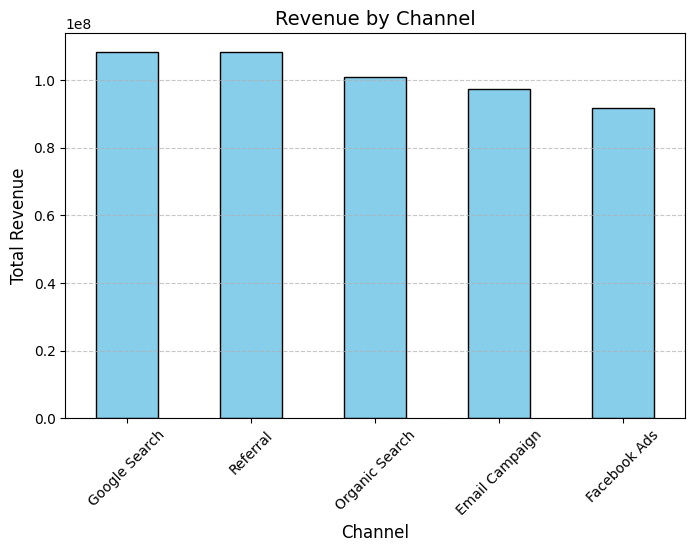

In [ ]:
# Group by channel and sum revenue
channel_revenue = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
channel_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Revenue by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


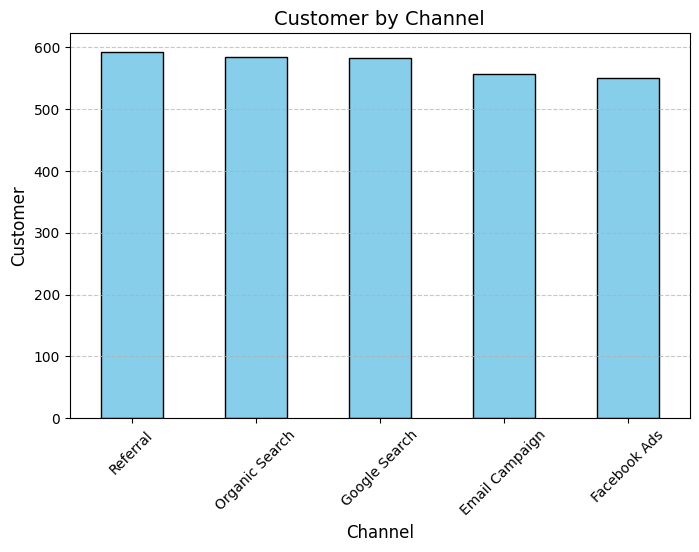

In [4]:
channel_customer = df.groupby('channel')['customer'].sum().sort_values(ascending=False)
# Plot
plt.figure(figsize=(8,5))
channel_customer.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Customer', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()